<a href="https://colab.research.google.com/github/harnalashok/deeplearning-sequences/blob/main/rossmann_timeSeries_noExtData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 20th March, 2021
# Myfolder: github/deeplearning-sequences
# Objectives:
#               i) Feature engineering in Time Series data
#              ii) Using fastai on tabular data
#
# https://colab.research.google.com/github/duchaba2/fastai_san_ramon_biztech/blob/master/smbt_rossman_data_clean.ipynb#scrollTo=UImWYEGiaFUS
# fastai.core: https://docs.fast.ai/tabular.core.html
# https://www.kaggle.com/hortonhearsafoo/fast-ai-lesson-3
# https://github.com/duchaba2/fastai_san_ramon_biztech

# Using fastai on tabular data
# https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb  

# Rossmann Data Engineering
#   Much of it is not implemented
#   See: https://www.kaggle.com/omgrodas/rossmann-data-engineering


In [ ]:
# Last amended: 17th March, 2021
# My folder: 
# Objectives:
#           i) Predicting sales in Rossmann Store Sales
#          ii) Feature generation in TimeSeries data

# The problem
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### Field descriptions

Most of the fields are self-explanatory. The following are descriptions for those that aren't.
    
>  **Id** - an Id that represents a (Store, Date) duple within the test set<br>
>  **Store** - a unique Id for each store<br>
>  **Sales** - the turnover for any given day (this is what you are predicting)<br>
>  **Customers** - the number of customers on a given day<br>
>  **Open** - an indicator for whether the store was open: 0 = closed, 1 = open<br>
>  **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None<br>
>  **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools<br>
>  **StoreType** - differentiates between 4 different store models: a, b, c, d<br>
>  **Assortment** - describes an assortment level: a = basic, b = extra, c = extended<br>
>   **CompetitionDistance** - distance in meters to the nearest competitor store<br>
>  **CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened<br>
>  **Promo** - indicates whether a store is running a promo on that day<br>
> **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating<br>
> **Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2<br>
>  **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


### Libraries and data files

In [3]:
#import pytorch and AI
!pip install --upgrade git+https://github.com/fastai/fastai.git

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-41xhgmsz
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-41xhgmsz
ERROR: Operation cancelled by user


In [4]:
#(Optional) double check your import pytorch and fast.ai version
# fastai related
# The 'tabular' module has 
#  all the functions as on this page:
#   https://docs.fast.ai/tabular.core.html

from fastai.tabular import *
import fastai
from fastai.tabular import *
from fastai.tabular.all import *

from fastai.basics import *
#import fastai.utils
#from fastai.data import *

In [5]:
# 1.0 Connect to your google drive
#     Transfer rossmann files from 
#     gdrive to colab VM

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1.1 Copy files from source to Colab
source="/content/drive/MyDrive/Colab_data_files/rossmannStoreSales"
dest="/content"

# 1.1.1 Remove existing folders
! rm -rf $dest/rossmannStoreSales

# 1.1.2 Copy files from gdrive to colab VM
! cp -r $source $dest/rossmannStoreSales

# 1.1.3 Check
! ls -la $dest/rossmannStoreSales


In [ ]:
# 1.2 Untar tgz file
! tar -xvzf $dest/rossmannStoreSales/rossmann.tgz -C $dest/rossmannStoreSales/

# 1.2.1 And check if all files are there
! ls -la $dest/rossmannStoreSales

In [25]:
# 1.3 Call libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [13]:
# 1.4 Display output of multiple commands from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 1.5 Path to our files
path = "/content/rossmannStoreSales"
os.chdir(path)
os.listdir()

### CAUTION--Clean-up from gdrive--CAUTION
Let us clean up from gdrive last saved processed files of this project, if they exist.


In [ ]:
# 1.6 Our path
path = "/content/drive/MyDrive/Colab_data_files/"

# 1.6.1
if os.path.exists(path + "joined"):
  os.remove(path + "joined") 

# 1.6.2
if os.path.exists(path + "joined_p"):
  os.remove(path + "joined_p")

# 1.6.3
if os.path.exists(path + "joined_fp"):
  os.remove(path+"joined_fp")

# 1.6.4
if os.path.exists(path + "joined_ffp"):
  os.remove(path+"joined_ffp")

# 1.6.5
if os.path.exists(path + "joined_fpg"):
  os.remove(path+"joined_fpg")  

# 1.6.6
if os.path.exists(path + "joined_test"):
  os.remove(path+"joined_test")    

In [ ]:
# 1.6.7 Check if all files deleted
os.listdir(path)

['LCDataDictionary.xlsx',
 'pos.zip',
 'winequality-red.csv',
 'bioresponse_train.csv.zip',
 'cats_dogs.tar.gz',
 'model',
 'talinkigData_out.csv.zip',
 'talkingData',
 'vectors.tsv',
 'metadata.tsv',
 'rossmannStoreSales']

## Data Processing and Feature Engineering

### Read all data

In [ ]:
# 2.0 Read all seven files using pandas
train = pd.read_csv("train.csv")
store = pd.read_csv("store.csv")

# 2.0.1
test = pd.read_csv("test.csv")



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# 2.0.3 Also set options to display all rows/all columns
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [ ]:
# 2.0.4 Check if read
#       ((1017209, 9), (41088, 8), (1115, 10))
train.shape , test.shape, store.shape

((1017209, 9), (41088, 8), (1115, 10))

### Explore train data

In [ ]:
# 2.1 Look at train data
print("\n---train----\n")
train.shape         # (1017209, 9)
print("\n------train------\n")
train.head()
print("\n-----Summary------\n")
train.describe()
print("\n-----dtypes------\n")
train.dtypes


---train----



(1017209, 9)


------train------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1



-----Summary------



,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00



-----dtypes------



Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [ ]:
# 2.2
train['Store'].nunique()             # 1115
print()
train['Promo'].nunique()             # 2
train['Promo'].unique()              # [1,0] 
print()
train['Open'].nunique()              # 2
train['Open'].unique()               # [1,0]
print()
train['SchoolHoliday'].nunique()     # 2
train['SchoolHoliday'].unique()
print()
train['StateHoliday'].nunique()      # 5
train['StateHoliday'].unique()       # ['0', 'a', 'b', 'c', 0]
print()
train['Date'].nunique()              # 942

1115

2

array([1, 0])

2

array([1, 0])

2

array([1, 0])

5

array(['0', 'a', 'b', 'c', 0], dtype=object)

942

In [ ]:
# 2.3 About nulls
#     No nulls here
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Explore Store data

In [ ]:
# 3.0 Look at store data
print("\n---shape----\n")
store.shape         # (1115, 10)
print("\n------data------\n")
store.head()
print("\n-----Summary------\n")
store.describe()
print("\n-----dtypes------\n")
store.dtypes


---shape----



(1115, 10)


------data------



,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN



-----Summary------



,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000



-----dtypes------



Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [ ]:
# 3.1
store['StoreType'].unique()     # ['c', 'a', 'd', 'b']
print()
store['Assortment'].unique()    # ['a', 'c', 'b']
print()
store['Promo2'].unique()        # [0,1]
print()
np.sort(store['CompetitionOpenSinceYear'].unique()) # Large number of years from 1961, 1990 to 2015
                                                    #  excluding NaN and 1900

array(['c', 'a', 'd', 'b'], dtype=object)

array(['a', 'c', 'b'], dtype=object)

array([0, 1])

array([1900., 1961., 1990., 1994., 1995., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015.,   nan])

In [ ]:
# 3.2 Whenever Promo2 is zero, three other columns carry NaN values
store.loc[store['Promo2'] == 0, ['Promo2','Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']].head(5)
print()
store.isnull().sum()

,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN
5,0,NaN,NaN,NaN
6,0,NaN,NaN,NaN


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# 3.3 Three cases where CompetitionDistance is NULL
#     CompetitionOpenSinceMonth and CompetitionOpenSinceYear
#     are also NULL

store.loc[store['CompetitionDistance'].isnull() , :].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


### More explorations

In [ ]:
# 4.1 StateHoliday
train.StateHoliday.dtype
print()
train.StateHoliday[:4]

dtype('O')

0    0
1    0
2    0
3    0
Name: StateHoliday, dtype: object

### Transform *StateHoliday* field
We turn state Holidays to booleans, to make them more convenient for modeling. We can do calculations on pandas fields using notation very similar (often identical) to numpy.

In [ ]:
# 5.1 StateHoliday replace by True/False
train.StateHoliday = train.StateHoliday!='0'
train.StateHoliday[:4]
print()
# 5.2
test.StateHoliday = test.StateHoliday!='0'
test.StateHoliday[:4]

0    False
1    False
2    False
3    False
Name: StateHoliday, dtype: bool

0    False
1    False
2    False
3    False
Name: StateHoliday, dtype: bool

### Date components
Break date into its components

#### `add_datepart()` [fastai](https://github.com/fastai/fastai/blob/master/fastai/tabular/core.py#L15) function
The following extracts particular date fields from a complete datetime for the purpose of constructing categoricals.

You should ***always*** consider this feature extraction step when working with date-time. Without expanding your date-time into these additional fields, you can't capture any trend/cyclical behavior as a function of time at any of these granularities. We'll add to every table with a date field.

In [ ]:
# 6.0
## add_datepart()
# Break every date-field is broken into multiple components:
# ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
#  'Is_month_end', 'Is_month_start', 'Is_quarter_end', 
#  'Is_quarter_start', 'Is_year_end', 'Is_year_start']
#
# Source: https://colab.research.google.com/github/duchaba2/fastai_san_ramon_biztech/blob/master/smbt_rossman_data_clean.ipynb#scrollTo=AgmbiE0MR8LE

import re
def add_datepart(df, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."

    fld = df[fldname]
    fld_dtype = fld.dtype

    # If date-field in not of 'date' type,
    #  transform it
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)

    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = [
             'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
             'Is_month_end', 'Is_month_start', 'Is_quarter_end', 
             'Is_quarter_start', 'Is_year_end', 'Is_year_start'
             ]

    if time:
       attr = attr + ['Hour', 'Minute', 'Second']
    
    # Begin attribute extraction using '.dt. accessor
    for n in attr: 
      df[targ_pre + n] = getattr(fld.dt, n.lower())

    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    
    # If original date-field is to be dropped, drop it
    if drop: 
      df.drop(fldname, axis=1, inplace=True)

In [ ]:
# 6.1  Using above function, breakup
#      'dates' in all cases below
add_datepart(train, "Date", drop=False)
# 8.1.1
add_datepart(test, "Date", drop=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [ ]:
# 6.2 So what are the revised data shapes
train.shape    # (1017209, 22)
print()
test.shape     # (41088, 21)
# 8.3 And look at one data
train.head()

(1017209, 22)

(41088, 21)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,1,5,2015-07-31,5263,555,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800
1,2,5,2015-07-31,6064,625,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800
2,3,5,2015-07-31,8314,821,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800
3,4,5,2015-07-31,13995,1498,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800
4,5,5,2015-07-31,4822,559,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800


### Joining tables
We have several tables. Merge them, one by one

#### Define a general function to merge

`join_df` is a function for joining tables on specific fields. By default, we'll be doing a left outer join of right on the left argument using the given fields for each table. Pandas does joins using the merge method. The suffixes argument describes the naming convention for duplicate fields. We've elected to leave the duplicate field names on the left untouched, and append a "_y" to those on the right.

In [ ]:
# 7.0 Define a small function for merging tables
# df.merge(right,
#          how='inner',
#          left_on=None,     # Column or index level names to join on in the left DataFrame
#          right_on=None,    # Column or index level names to join on in the right DataFrame.
#          suffixes=('_x', '_y')) #  a string indicating the suffix to add to overlapping column name

def join_df(leftTable, rightTable, left_onField, right_onField=None, suffix='_y'):

    # 9.0.1 Both right and left fields would be same
    if right_onField is None: 
      right_onField = left_onField  # Both sides are same

    # 9.0.2 Return merged table  
    return leftTable.merge(
                            rightTable,
                            how='left',            # It is 'left' join AND NOT 'inner' join
                                                   # We cannot loose left-side data
                            left_on=left_onField,     
                            right_on=right_onField, 
                            suffixes=("", suffix)   # left side: no suffix, 
                                                    # right side default is "_y"
                                                    # unless mentioned in the function
                                                    # call arguments 
                            )
    

#### Join train+store
From available data

In [ ]:
# 8   join3: (train+store)
#     join_df(leftTable, rightTable, left_onField, right_onField=None, suffix='_y')

train.shape    # (1017209, 22)
print()
joined = join_df(train,
                 store,
                 "Store"
                 )

joined_test = join_df(test, store, "Store")
len(joined[joined.StoreType.isnull()]),len(joined_test[joined_test.StoreType.isnull()])  # (0, 0)
joined.shape   # (1017209, 31)
print()
joined_test.shape #  (41088, 30)

(1017209, 22)

(0, 0)

(1017209, 31)

(41088, 30)

In [ ]:
# 9.1  Check point
#       With all above
# (1115, 10) (1017209, 22) (1017209, 31)
store.shape   
train.shape   
joined.shape   

(1115, 10)

(1017209, 22)

(1017209, 31)

In [ ]:
# 9.2 Check
joined.columns
len(joined.columns)   # 31

# 9.3  Assign value to 'name' attribute of DataFrame
#      We will use it shortly
joined.name = "joined"
joined_test.name = "joined_test"

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

31

In [ ]:
# 10.0 Remove columns having suffix of '_y'

for df in (joined, joined_test):
    for c in df.columns:
        if c.endswith('_y'):
            if c in df.columns:
              print(c,df.name)
              df.drop(c, inplace=True, axis=1)

In [ ]:
# 10.0.1
# Check point
store.shape    # (1115, 10)
train.shape    # (1017209, 22)
joined.shape       # (1017209, 31)
joined_test.shape  # (41088, 30)

(1115, 10)

(1017209, 22)

(1017209, 31)

(41088, 30)

### Missing values
Next we'll fill in missing values to avoid complications with `NA`'s. `NA` (not available) is how Pandas indicates missing values; many models have problems when missing values are present, so it's always important to think about how to deal with them. In these cases, we are picking an arbitrary *signal value* that doesn't otherwise appear in the data. We will also create some features

In [ ]:
# 11.0 Just explore
joined[['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'Promo2SinceYear', 'Promo2SinceWeek']].head(5)
joined[['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'Promo2SinceYear', 'Promo2SinceWeek']].describe()

,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,Promo2SinceYear,Promo2SinceWeek
0,2008.0,9.0,NaN,NaN
1,2007.0,11.0,2010.0,13.0
2,2006.0,12.0,2011.0,14.0
3,2009.0,9.0,NaN,NaN
4,2015.0,4.0,NaN,NaN


,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,Promo2SinceYear,Promo2SinceWeek
count,693861.000000,693861.000000,509178.000000,509178.000000
mean,2008.690228,7.222866,2011.752774,23.269093
std,5.992644,3.211832,1.662870,14.095973
min,1900.000000,1.000000,2009.000000,1.000000
25%,2006.000000,4.000000,2011.000000,13.000000
50%,2010.000000,8.000000,2012.000000,22.000000
75%,2013.000000,10.000000,2013.000000,37.000000
max,2015.000000,12.000000,2015.000000,50.000000


#### Create missing values indicator columns
For any missing value column, before filling it, create another column to indicate location of missing values

In [ ]:
#11.0.1 Create columns that indicates that CompetitionOpenSince is missing
for df in (joined,joined_test):
  #Create column that indicates that CompetitionOpenSince is missing
  df["CompetitionOpenNA"]=False
  df.loc[df.CompetitionOpenSinceYear.isna(),"CompetitionOpenNA"]=True

  
  # 11.0.2 Create columns that indicates that CompetitionDistance is missing
  df["CompetitionDistanceNA"]=False
  df.loc[df.CompetitionDistance.isna(),"CompetitionDistanceNA"]=True

#### Fill missing values

In [ ]:
# 11.1
for df in (joined,joined_test):

    ##AA. 'CompetitionOpenSinceYear' & 'CompetitionOpenSinceMonth'
    ##     15/01/1900   ==== 354 missing values each
    # Fill in year as 1900 (354 missing values)
    df['CompetitionOpenSinceYear'] = df.CompetitionOpenSinceYear.fillna(1900).astype(np.int32)
    # Fill in month as 1 (354 missing values)
    df['CompetitionOpenSinceMonth'] = df.CompetitionOpenSinceMonth.fillna(1).astype(np.int32)

    ##BB. 'Promo2SinceYear' and 'Promo2SinceWeek'
    #      01/01/1900    ==== 544 missing values
    # Fill in year as 1900. (544 missing values)
    df['Promo2SinceYear'] = df.Promo2SinceYear.fillna(1900).astype(np.int32)
    # Fill in week as 1. (544 missing values)
    df['Promo2SinceWeek'] = df.Promo2SinceWeek.fillna(1).astype(np.int32)

In [ ]:
# 11.2 Assume missing CompetitionDistance data is beacuse the competition is to far away to be registered

df.loc[df.CompetitionDistance.isna(),"CompetitionDistance"]= df.CompetitionDistance.max()*2  


#### Create new feature from two 'date' features

In [ ]:
# 12. We create a new feature from these two features
joined[['Date','CompetitionOpenSinceYear','CompetitionOpenSinceMonth'] ].head()

,Date,CompetitionOpenSinceYear,CompetitionOpenSinceMonth
0,2015-07-31,2008,9
1,2015-07-31,2007,11
2,2015-07-31,2006,12
3,2015-07-31,2009,9
4,2015-07-31,2015,4


In [ ]:
# 12.1 Create two features: One new date feature 
#                           and one 'days' elapsed feature:

for df in (joined,joined_test):
    # 12.1 Create a new feature 'CompetitionOpenSince'
    #       CompetitionOpenSince whose year is CompetitionOpenSinceYear
    #        and whose month is CompetitionOpenSinceMonth and the 
    #         day is 15 (selected randomly)
    df["CompetitionOpenSince"] = pd.to_datetime(
                                                 dict
                                                     (
                                                       year=df.CompetitionOpenSinceYear, 
                                                       month=df.CompetitionOpenSinceMonth,
                                                       day=15   # This is an arbitrary selection
                                                     )
                                                )
    # 12.2 Another feature. Days elapsed from 'CompetitionOpenSince' to current 'date'
    df["CompetitionDaysOpen"] = df.Date.subtract(df.CompetitionOpenSince).dt.days

#### Data cleaning

In [ ]:
# 12.3 Some cleaning of data:

for df in (joined,joined_test):
    # CompetitionDaysOpen feature was just created (See above)
    df.loc[df.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
    # Also before 1990 setting CompetitionDaysOpen as 0
    #  The earliest CompetitionOpenSinceYear  is 1990
    df.loc[df.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0

In [ ]:
# 12.3.1
joined.shape   # (1017209, 78)     (1017209, 35)
print()
import sys
np.set_printoptions(threshold=sys.maxsize)
np.sort(joined.columns.values)

(1017209, 35)

array(['Assortment', 'CompetitionDaysOpen', 'CompetitionDistance', 'CompetitionDistanceNA', 'CompetitionOpenNA',
       'CompetitionOpenSince', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Customers', 'Date', 'Day',
       'DayOfWeek', 'Dayofweek', 'Dayofyear', 'Elapsed', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Month', 'Open', 'Promo', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Sales', 'SchoolHoliday', 'StateHoliday', 'Store', 'StoreType', 'Week',
       'Year'], dtype=object)

### Save processed data to disk--I
This will also delete all tables. File created `joined`

In [ ]:
# 12.4 Save data to disk
# StackOverflow: https://stackoverflow.com/a/17098736/3282777

path = "/content/drive/MyDrive/Colab_data_files/"
joined.to_pickle(path +"joined")
joined_test.to_pickle(path +"joined_test")

In [ ]:
# 12.5 Check saved files:
#  joined_test size: 7683558  
#  joined size:      198872489 

!ls -la $path 

total 573963
-rw------- 1 root root   2841873 Dec 27 10:04 bioresponse_train.csv.zip
-rw------- 1 root root  69468154 Feb 17 00:53 cats_dogs.tar.gz
-rw------- 1 root root 197852965 Mar 20 07:54 joined
-rw------- 1 root root   7642377 Mar 20 07:54 joined_test
-rw------- 1 root root     20995 May  2  2016 LCDataDictionary.xlsx
-rw------- 1 root root     76166 Mar 13 12:21 metadata.tsv
drwx------ 2 root root      4096 Feb 17 07:15 model
-rw------- 1 root root   2038945 Oct 30  2019 pos.zip
drwx------ 2 root root      4096 Mar 15 13:04 rossmannStoreSales
-rw------- 1 root root 303835737 Feb 21 04:15 talinkigData_out.csv.zip
drwx------ 2 root root      4096 Feb 21 04:46 talkingData
-rw------- 1 root root   3861202 Mar 13 12:21 vectors.tsv
-rw------- 1 root root     84199 Dec 27 06:30 winequality-red.csv


In [ ]:
# 12.5.1 Clear memory for future work
del train
del test
del joined
del joined_test

### Read processed data from disk--I
Read file `joined` from disk

In [ ]:
# 12.6 Read saved files
path = "/content/drive/MyDrive/Colab_data_files/"
joined = pd.read_pickle(path +"joined")
joined_test =pd.read_pickle(path +"joined_test")

In [ ]:
# 12.6.1 Verify
joined.shape       # (1017209, 35)
#joined_test.shape  # (41088, 75)

(1017209, 35)

## Feature creation
Create more features

### Elapsed time



It is common when working with time series data to extract data that explains relationships across rows as opposed to columns, e.g.:
* Running averages
* Time until next event
* Time since last event

This is often difficult to do with most table manipulation frameworks, since they are designed to work with relationships across columns. As such, we've created a class to handle this type of data.

We'll define a function `get_elapsed` for cumulative counting across a sorted dataframe. Given a particular field `fld` to monitor, this function will start tracking time since the last occurrence of that field. When the field is seen again, the counter is set to zero.

Upon initialization, this will result in datetime na's until the field is encountered. This is reset every time a new store is seen. We'll see how to use this shortly.  

Let's walk through an example.

Say we're looking at School Holiday. We'll first sort by Store, then Date, and then call `add_elapsed('SchoolHoliday', 'After')`:
This will apply to each row with School Holiday:
* A applied to every row of the dataframe in order of store and date
* Will add to the dataframe the days since seeing a School Holiday
* If we sort in the other direction, this will count the days until another holiday.

The following figure is from this [link](https://docs.fast.ai/tabular.core.html#add_elapsed_times):

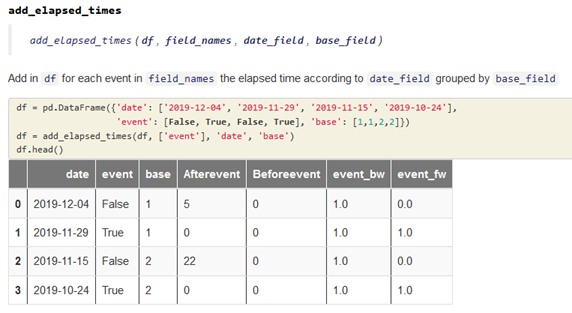

<br>
The implementiation details written as a pseudo-code are as given below:

Pseudo-code for calculating elapsed time

```
0. Initialize
last_store_Seen    = 0
last_date_recorded = np.datetime64() 

1. Read current store number: csn
2. Read current SchoolHoliday value: sh_value
3. Read current Date: c_date
Begin  
Is csn == last_store_seen
  if NO:   
          last_store_seen = csn
          after = 0
          is sh_value == True
            if Yes, last_date_recorded = c_date
            if No---last_date_recorded = np.datetime64() 
   if YES:
          is sh_value == True
            if Yes, last_date_recorded = c_date
            after = 0
            if False, after = c_date - last_date_recorded

```





In [ ]:
# 13.0 We are NOT using this function. But worth examining.
#      The source code of the following function is here:
#      https://github.com/fastai/fastai/blob/master/fastai/tabular/core.py#L54
# Usage: https://docs.fast.ai/tabular.core.html#add_elapsed_times
#
#      We are NOT using this function, but it is worth trying.
#      Other useful functions are at above link.

def add_elapsed_times(df, field_names, date_field, base_field):
    "Add in `df` for each event in `field_names` the elapsed time according to `date_field` grouped by `base_field`"
    field_names = list((field_names))
    #Make sure date_field is a date and base_field a bool
    df[field_names] = df[field_names].astype('bool')
    make_date(df, date_field)

    work_df = df[field_names + [date_field, base_field]]
    work_df = work_df.sort_values([base_field, date_field])
    work_df = _get_elapsed(work_df, field_names, date_field, base_field, 'After')
    work_df = work_df.sort_values([base_field, date_field], ascending=[True, False])
    work_df = _get_elapsed(work_df, field_names, date_field, base_field, 'Before')

    for a in ['After' + f for f in field_names] + ['Before' + f for f in field_names]:
        work_df[a] = work_df[a].fillna(0).astype(int)

    for a,s in zip([True, False], ['_bw', '_fw']):
        work_df = work_df.set_index(date_field)
        tmp = (work_df[[base_field] + field_names].sort_index(ascending=a)
                      .groupby(base_field).rolling(7, min_periods=1).sum())
        tmp.drop(base_field,1,inplace=True)
        tmp.reset_index(inplace=True)
        work_df.reset_index(inplace=True)
        work_df = work_df.merge(tmp, 'left', [date_field, base_field], suffixes=['', s])
    work_df.drop(field_names,1,inplace=True)
    return df.merge(work_df, 'left', [date_field, base_field])

##### Our `get_event_elapsed()` function

In [ ]:
# 13.1 See StackOverflow
#      https://stackoverflow.com/a/18215499/3282777

def get_event_elapsed(base_fld, event_fld, dt_fld, df):
  """
  Example:
   base_fld = 'Store'        For every store
   fld = 'SchoolHoliday'     when this event happens, switch on your stop-watch
                               The stop-watch adds a day for each passing day, till
                                next this event happens. At that time reset stop-watch
                                 This is 'After-field'
   dt_fld=Date field                             
   
   How many days, hence, the next event will happen
   To calculate this, put data in descending  order
   date-wise and apply the algorithm, as if for 'After-field'
   So for a given 'Store', next 'SchoolHoliday'
   has come After how many days since the last

  """
  # 13.2 Initialise all variables
  day1 = np.timedelta64(1, 'D')        # See expt below
  last_store_seen = 0                  # This store does not exist
  last_date_recorded = np.datetime64() # Nat: Not a time (same as None)
  after = 0                            # Initial value in 'after' field
  res = []                             # Collection of all values
                                       # as we move forward in time

  for csn,sh_value,c_date in zip(df[base_fld].values,df[event_fld].values,df[dt_fld].values):
    # Get current store
    if csn != last_store_seen:
      after = 0
      last_store_seen = csn
      if sh_value:
        last_date_recorded = c_date
      else:
        last_date_recorded = np.datetime64()
    else:
      if sh_value:
        last_date_recorded = c_date
        after =0
      else:
        """
        StackOverFlow: https://stackoverflow.com/a/18215499/3282777
        In the absence of division by day1
        we get the following: 
        numpy.timedelta64(1,'D'),
        numpy.timedelta64(2,'D'),
        numpy.timedelta64(3,'D'),
        numpy.timedelta64(4,'D'),
        """
        after = (c_date - last_date_recorded).astype('timedelta64[D]') /  day1
    res.append(after)
  return(res)    
  


#### Simple experiments

In [ ]:
# 14.0 Here is 
print(np.timedelta64(1, 'D'))  # 1 days
print(type(np.timedelta64(1, 'D')))   # It is a timedelta type
print(np.datetime64())         # NaT

1 days
<class 'numpy.timedelta64'>
NaT


In [ ]:
# 14.1 Create a date-range from 1st March to 16th March
dr = pd.date_range(start = '03/01/2021', end = '03/16/2021').to_list()
# 14.1.1 Create a data-frame
xy = pd.DataFrame(
                    {
                      "event" : [1,0,1,1,0,1, 0,0,0,0,1,1, 0,0,1,0] * 2, 
                      "date_fld" : dr * 2,
                      "base_fld" : [1]* 16 + [2]* 16
                    }
                  )
# 14.1.2
xy.shape   # (32, 3)
xy.head()
xy.tail()

# 14.1.3 Shuffle the DataFrame rows 
xy = xy.sample(frac = 1)  
xy.head()

(32, 3)

,event,date_fld,base_fld
0,1,2021-03-01,1
1,0,2021-03-02,1
2,1,2021-03-03,1
3,1,2021-03-04,1
4,0,2021-03-05,1


,event,date_fld,base_fld
27,1,2021-03-12,2
28,0,2021-03-13,2
29,0,2021-03-14,2
30,1,2021-03-15,2
31,0,2021-03-16,2


,event,date_fld,base_fld
0,1,2021-03-01,1
15,0,2021-03-16,1
6,0,2021-03-07,1
13,0,2021-03-14,1
11,1,2021-03-12,1


In [ ]:
# 14.2 Sort our dataset on ['base_fld','date_fld'] 
#      dates in ascending order
xy = xy.sort_values(['base_fld','date_fld'])

# 14.3 Then apply our function
#      get_event_elapsed(grfld, event_fld, dt_fld, df)

# 14.4
xy['after_event']= get_event_elapsed('base_fld','event', 'date_fld', xy )
xy

,event,date_fld,base_fld,after_event
0,1,2021-03-01,1,0.0
1,0,2021-03-02,1,1.0
2,1,2021-03-03,1,0.0
3,1,2021-03-04,1,0.0
4,0,2021-03-05,1,1.0
5,1,2021-03-06,1,0.0
6,0,2021-03-07,1,1.0
7,0,2021-03-08,1,2.0
8,0,2021-03-09,1,3.0
9,0,2021-03-10,1,4.0


In [ ]:
# 14.4 Sort database with dates in descending order
xy = xy.sort_values(['base_fld','date_fld'], ascending = [True,False])

# 14.5 Now apply
#     get_event_elapsed(grfld, event_fld, dt_fld, df)
xy['before_event']= get_event_elapsed('base_fld','event', 'date_fld', xy )
xy

,event,date_fld,base_fld,after_event,before_event
15,0,2021-03-16,1,1.0,0.0
14,1,2021-03-15,1,0.0,0.0
13,0,2021-03-14,1,2.0,-1.0
12,0,2021-03-13,1,1.0,-2.0
11,1,2021-03-12,1,0.0,0.0
10,1,2021-03-11,1,0.0,0.0
9,0,2021-03-10,1,4.0,-1.0
8,0,2021-03-09,1,3.0,-2.0
7,0,2021-03-08,1,2.0,-3.0
6,0,2021-03-07,1,1.0,-4.0


In [ ]:
# 15.0 Function on Kaggle
#      See https://colab.research.google.com/github/duchaba2/fastai_san_ramon_biztech/blob/master/smbt_rossman_data_clean.ipynb#scrollTo=qdOUyEHcR8Ks
def get_elapsed(fld, pre):
    day1 = np.timedelta64(1, 'D')
    last_date = np.datetime64()
    last_store = 0
    res = []

    for s,v,d in zip(xy.base_fld.values,xy[fld].values, xy.date_fld.values):
        if s != last_store:
            last_date = np.datetime64()
            last_store = s
        if v: last_date = d
        res.append(((d-last_date).astype('timedelta64[D]') / day1))
    xy[pre+fld] = res

In [ ]:
# 15.1 Apply the get_elapsed function
#      Compare results. They are the same.

fld = 'event'
xy = xy.sort_values(['base_fld', 'date_fld'])
get_elapsed(fld, 'After')
xy = xy.sort_values(['base_fld', 'date_fld'], ascending=[True, False])
get_elapsed(fld, 'Before')
xy

,event,date_fld,base_fld,after_event,before_event,Afterevent,Beforeevent
15,0,2021-03-16,1,1.0,0.0,1.0,NaN
14,1,2021-03-15,1,0.0,0.0,0.0,0.0
13,0,2021-03-14,1,2.0,-1.0,2.0,-1.0
12,0,2021-03-13,1,1.0,-2.0,1.0,-2.0
11,1,2021-03-12,1,0.0,0.0,0.0,0.0
10,1,2021-03-11,1,0.0,0.0,0.0,0.0
9,0,2021-03-10,1,4.0,-1.0,4.0,-1.0
8,0,2021-03-09,1,3.0,-2.0,3.0,-2.0
7,0,2021-03-08,1,2.0,-3.0,2.0,-3.0
6,0,2021-03-07,1,1.0,-4.0,1.0,-4.0


#### Now with real data
Experiment finished. We apply above function to events of 'SchoolHoliday', 'Promo', 'StateHoliday'

In [ ]:
# 15.1
# get_event_elapsed(base_fld, event_fld, dt_fld, df)

fld = 'SchoolHoliday'
joined = joined.sort_values(['Store', 'Date'])
joined['after_event_sh'] = get_event_elapsed('Store', fld, 'Date', joined)
joined = joined.sort_values(['Store', 'Date'], ascending=[True, False])
joined['before_event_sh'] = get_event_elapsed('Store', fld, 'Date', joined)

In [ ]:
# 15.2
fld = 'StateHoliday'
joined = joined.sort_values(['Store', 'Date'])
joined['after_event_st'] = get_event_elapsed('Store', fld, 'Date', joined)
joined = joined.sort_values(['Store', 'Date'], ascending=[True, False])
joined['before_event_st'] = get_event_elapsed('Store', fld, 'Date', joined)

In [ ]:
# 15.2.1 Check
joined.shape  # (1017209, 39)


(1017209, 39)

In [ ]:
# 15.3
fld = 'Promo'
joined = joined.sort_values(['Store', 'Date'])
joined['after_event_pr'] = get_event_elapsed('Store', fld, 'Date', joined)
joined = joined.sort_values(['Store', 'Date'], ascending=[True, False])
joined['before_event_pr'] = get_event_elapsed('Store', fld, 'Date', joined)

In [ ]:
# 15.3.1 Check
joined.shape  # (1017209, 41)


(1017209, 41)

We're going to set the active index to Date.

In [ ]:
# 16.0
joined = joined.set_index("Date")
joined.shape   # (1017209, 40)
joined.head()

(1017209, 40)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenNA,CompetitionDistanceNA,CompetitionOpenSince,CompetitionDaysOpen,after_event_sh,before_event_sh,after_event_st,before_event_st,after_event_pr,before_event_pr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,c,a,1270.0,9,2008,0,1,1900,NaN,False,False,2008-09-15,2510,0.0,0.0,57.0,0.0,0.0,0.0
2015-07-30,1,4,5020,546,1,1,False,1,2015,7,31,30,3,211,False,False,False,False,False,False,1438214400,c,a,1270.0,9,2008,0,1,1900,NaN,False,False,2008-09-15,2509,0.0,0.0,56.0,NaN,0.0,0.0
2015-07-29,1,3,4782,523,1,1,False,1,2015,7,31,29,2,210,False,False,False,False,False,False,1438128000,c,a,1270.0,9,2008,0,1,1900,NaN,False,False,2008-09-15,2508,0.0,0.0,55.0,NaN,0.0,0.0
2015-07-28,1,2,5011,560,1,1,False,1,2015,7,31,28,1,209,False,False,False,False,False,False,1438041600,c,a,1270.0,9,2008,0,1,1900,NaN,False,False,2008-09-15,2507,0.0,0.0,54.0,NaN,0.0,0.0
2015-07-27,1,1,6102,612,1,1,False,1,2015,7,31,27,0,208,False,False,False,False,False,False,1437955200,c,a,1270.0,9,2008,0,1,1900,NaN,False,False,2008-09-15,2506,0.0,0.0,53.0,NaN,0.0,0.0


### Save data to disk--II
Save processed data to disk file `joined_p`

In [ ]:
# 16.1 Save data to disk as 'joined_p'
#      StackOverflow: https://stackoverflow.com/a/17098736/3282777

path = "/content/drive/MyDrive/Colab_data_files/"
joined.to_pickle(path +"joined_p")

In [ ]:
# 16.2 Check saved files
#      joined_p size: 512020944
!ls -la $path 

total 806914
-rw------- 1 root root   2841873 Dec 27 10:04 bioresponse_train.csv.zip
-rw------- 1 root root  69468154 Feb 17 00:53 cats_dogs.tar.gz
-rw------- 1 root root 197852965 Mar 20 07:54 joined
-rw------- 1 root root 238541919 Mar 20 07:55 joined_p
-rw------- 1 root root   7642377 Mar 20 07:54 joined_test
-rw------- 1 root root     20995 May  2  2016 LCDataDictionary.xlsx
-rw------- 1 root root     76166 Mar 13 12:21 metadata.tsv
drwx------ 2 root root      4096 Feb 17 07:15 model
-rw------- 1 root root   2038945 Oct 30  2019 pos.zip
drwx------ 2 root root      4096 Mar 15 13:04 rossmannStoreSales
-rw------- 1 root root 303835737 Feb 21 04:15 talinkigData_out.csv.zip
drwx------ 2 root root      4096 Feb 21 04:46 talkingData
-rw------- 1 root root   3861202 Mar 13 12:21 vectors.tsv
-rw------- 1 root root     84199 Dec 27 06:30 winequality-red.csv


### Read processed data--II
File is `joined_p`

In [ ]:
# 16.3 Read saved files
path = "/content/drive/MyDrive/Colab_data_files/"
joined = pd.read_pickle(path +"joined_p")
joined_test =pd.read_pickle(path +"joined_test")

In [ ]:
# 16.4 Check
joined.shape    # (1017209, 40)
#joined_test.shape  # (41088, 77)
joined.columns

(1017209, 40)

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenNA', 'CompetitionDistanceNA', 'CompetitionOpenSince',
       'CompetitionDaysOpen', 'after_event_sh', 'before_event_sh',
       'after_event_st', 'before_event_st', 'after_event_pr',
       'before_event_pr'],
      dtype='object')

### Rolling summaries

#### Simple experiment--I
Rolling average of prices

In [ ]:
# 17.0 
# https://benalexkeen.com/resampling-time-series-data-with-pandas/

stocks_nyse_path = "/content/drive/MyDrive/Colab_data_files/rossmannStoreSales/"

close_px = pd.read_csv(
                            stocks_nyse_path+"stock_px_2.csv",
                            parse_dates= True,
                            index_col = 0      # Make first column as index column
                          )

# 17.0.1
# Date wise prices for just four tickers
close_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


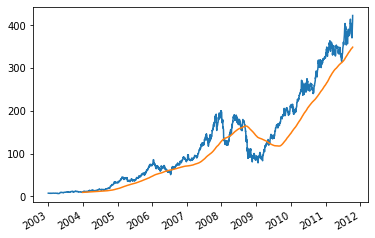

In [ ]:
#17.1 Pandas rolling window. 
#     Moving averages:
#     Summarise last 250 points 
#     and bring them forward

_=close_px.AAPL.plot()
_=close_px.AAPL.rolling(250).mean().plot()

In [ ]:
# 17.2
# Refer: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html
# rolling(
#           window, # Size of the moving window.
#                   # This is the number of observations 
#                   # used for calculating the statistic.
#                   # Each window will be a fixed size.
#           min_periods=None,
#           center=False,
#           win_type=None,
#           on=None,
#           axis=0, closed=None)

In [ ]:
# 17.3
# To understand rolling forward, let us do one
#  simple experiment. Just average last two points
#   and create a new column:


close_px['avg2'] = close_px['AAPL'].rolling(2).mean()
close_px['sum2'] = close_px['AAPL'].rolling(2).sum()
close_px[['AAPL', 'avg2','sum2']].head(10)


,AAPL,avg2,sum2
2003-01-02,7.40,NaN,NaN
2003-01-03,7.45,7.425,14.85
2003-01-06,7.45,7.450,14.90
2003-01-07,7.43,7.440,14.88
2003-01-08,7.28,7.355,14.71
2003-01-09,7.34,7.310,14.62
2003-01-10,7.36,7.350,14.70
2003-01-13,7.32,7.340,14.68
2003-01-14,7.30,7.310,14.62
2003-01-15,7.22,7.260,14.52


####Simple Experiment--II
Group based rolling summaries. I have daily data for two Stores. For each store, I want moving separate moving average of last two days:

In [ ]:
# 18.0 Create a date-range from 1st March to 16th March
dr = pd.date_range(start = '03/01/2021', end = '03/16/2021').to_list()

# 18.0.1 Create a data-frame
xy = pd.DataFrame(
                    {
                      "SchoolHoliday" : [1,0,1,1,0,1, 0,0,0,0,1,1, 0,0,1,0] * 2,
                      "StateHoliday" : [0,0,0,1,0,1, 1,0,1,0,1,1, 0,1,0,1] * 2, 
                      "Promo"        : [1,1,0,0,1,0,0,1,1,1,0,0,1,0,0,1] * 2,
                      "date_fld"     : dr * 2,
                      "Store"        : [1]* 16 + [2]* 16,
                      "price"    : np.random.normal(loc = 0.24, scale=1, size = (32,) )
                    }
                  )
# 18.0.2 Shuffle the DataFrame rows 
xy = xy.sample(frac = 1)  
xy.head()

,SchoolHoliday,StateHoliday,Promo,date_fld,Store,price
1,0,0,1,2021-03-02,1,0.914306
7,0,0,1,2021-03-08,1,-0.304581
28,0,0,1,2021-03-13,2,-0.357563
16,1,0,1,2021-03-01,2,-1.943169
30,1,0,0,2021-03-15,2,0.306663


To create a rolling window, I must put date field as Index

In [ ]:
# 18.0.3
df = xy.set_index('date_fld')
df.shape
df.head()

(32, 5)

,SchoolHoliday,StateHoliday,Promo,Store,price
date_fld,,,,,
2021-03-02,0,0,1,1,0.914306
2021-03-08,0,0,1,1,-0.304581
2021-03-13,0,0,1,2,-0.357563
2021-03-01,1,0,1,2,-1.943169
2021-03-15,1,0,0,2,0.306663


Next I perform grouping and perform moving averages. For each group, a separate bag/basket is created and moving average taken within that group.

In [ ]:
# 18.0.4 Here is moving avg and 
#        an explanation of code
#           Just consider these two columns
#           Sort index date wise
#           Create separate bags for each group
#           Within each bag create rolling windows
#           Take mean within each window 

mov_avg = df[['Store','price']]. \
          sort_index(). \
          groupby("Store"). \
          rolling(2, min_periods=1). \
          mean()                       


In [ ]:
# 18.0.5 Check if moving avg is taken:

mov_avg.head()

# 18.0.6 And our data for Store 1, 
#        sorted by date-index
df.loc[df['Store'] == 1, ['Store', 'price']].sort_index().head()

Store     price
Store date_fld                   
1     2021-03-01    1.0  0.408913
      2021-03-02    1.0  0.661609
      2021-03-03    1.0  1.182727
      2021-03-04    1.0  1.144267
      2021-03-05    1.0  0.294226

,Store,price
date_fld,,
2021-03-01,1,0.408913
2021-03-02,1,0.914306
2021-03-03,1,1.451147
2021-03-04,1,0.837387
2021-03-05,1,-0.248936


#### Simple Experiment--III
Group by store and take sum of multiple fields 

In [ ]:
# 19.0 Create a date-range from 1st March to 16th March
dr = pd.date_range(start = '03/01/2021', end = '03/16/2021').to_list()

# 19.0.1 Create a data-frame
xy = pd.DataFrame(
                    {
                      "SchoolHoliday" : [1,0,1,1,0,1, 0,0,0,0,1,1, 0,0,1,0] * 2,
                      "StateHoliday" : [0,0,0,1,0,1, 1,0,1,0,1,1, 0,1,0,1] * 2, 
                      "Promo"        : [1,1,0,0,1,0,0,1,1,1,0,0,1,0,0,1] * 2,
                      "date_fld"     : dr * 2,
                      "Store"        : [1]* 16 + [2]* 16,
                      "price"    : np.random.normal(loc = 0.24, scale=1, size = (32,) )
                    }
                  )

# 19.0.2 Shuffle the DataFrame rows 
xy = xy.sample(frac = 1)  
xy.head(3)

,SchoolHoliday,StateHoliday,Promo,date_fld,Store,price
23,0,0,1,2021-03-08,2,-0.311006
21,1,1,0,2021-03-06,2,0.570303
25,0,0,1,2021-03-10,2,1.242664


In [ ]:
# 19.0.3 Set date-index
df = xy.set_index('date_fld')
df.shape
df.head(3)

(32, 5)

,SchoolHoliday,StateHoliday,Promo,Store,price
date_fld,,,,,
2021-03-08,0,0,1,2,-0.311006
2021-03-06,1,1,0,2,0.570303
2021-03-10,0,0,1,2,1.242664


We will now total up holidays in every two-day periods.

In [ ]:
# 19.0.4
columns = ['SchoolHoliday', 'StateHoliday', 'Promo']

# 19.0.5
bwd_xy = df[['Store'] +columns].\
         sort_index().\
         groupby("Store").\
         rolling(2, min_periods=1).\
         sum()

Note that summation is done, in each bag of 'Store', not only of holidays but also of 'Store'. This is the reason, you observe under Store column, values 1,2. These are not store numbers but moving-summation of values in 'Store' column. Try moving summation of three values and check.

In [ ]:
# 19.0.6 Our data has multiple indexes
bwd_xy.head()

Store  SchoolHoliday  StateHoliday  Promo
Store date_fld                                             
1     2021-03-01    1.0            1.0           0.0    1.0
      2021-03-02    2.0            1.0           0.0    2.0
      2021-03-03    2.0            1.0           0.0    1.0
      2021-03-04    2.0            2.0           1.0    0.0
      2021-03-05    2.0            1.0           1.0    1.0

In [ ]:
# 19.1 Extract data for Ist index
# https://stackoverflow.com/a/18835121/3282777

xx = bwd_xy.iloc[bwd_xy.index.get_level_values('Store') == 1]
xx.head()

Store  SchoolHoliday  StateHoliday  Promo
Store date_fld                                             
1     2021-03-01    1.0            1.0           0.0    1.0
      2021-03-02    2.0            1.0           0.0    2.0
      2021-03-03    2.0            1.0           0.0    1.0
      2021-03-04    2.0            2.0           1.0    0.0
      2021-03-05    2.0            1.0           1.0    1.0

In [ ]:
# 19.2 We will drop 'Store' column
xx = xx.drop(columns = ['Store'])
xx.head()

SchoolHoliday  StateHoliday  Promo
Store date_fld                                      
1     2021-03-01            1.0           0.0    1.0
      2021-03-02            1.0           0.0    2.0
      2021-03-03            1.0           0.0    1.0
      2021-03-04            2.0           1.0    0.0
      2021-03-05            1.0           1.0    1.0

In [ ]:
# 19.3 To assist checking of moving summation,
#      we will create side-by-side columns of
#      actual vs moving summations:

# 19.3.1 Sort data and drop columns not needed
sk =  df.loc[df['Store'] == 1, :].sort_index().drop(columns = ['Store', 'price'])

# 19.3.2 Begin adding columns to sk from xx 
sk['schoolholiday'] = xx['SchoolHoliday'].values
sk['promo'] = xx['Promo'].values
sk['stateholiday'] = xx['StateHoliday'].values

# 19.3.4 Now check
sk[['SchoolHoliday', 'schoolholiday', 'Promo', 'promo','StateHoliday', 'stateholiday']]

,SchoolHoliday,schoolholiday,Promo,promo,StateHoliday,stateholiday
date_fld,,,,,,
2021-03-01,1,1.0,1,1.0,0,0.0
2021-03-02,0,1.0,1,2.0,0,0.0
2021-03-03,1,1.0,0,1.0,0,0.0
2021-03-04,1,2.0,0,0.0,1,1.0
2021-03-05,0,1.0,1,1.0,0,1.0
2021-03-06,1,1.0,0,1.0,1,1.0
2021-03-07,0,1.0,0,0.0,1,2.0
2021-03-08,0,0.0,1,1.0,0,1.0
2021-03-09,0,0.0,1,2.0,1,1.0


#### Next moving-summation on real data

We'll now use window functions in pandas to calculate rolling quantities. Here we're sorting by date (`sort_index()`) and counting the number of events of interest (`sum()`) defined in columns in the following week (`rolling()`), grouped by `Store` (groupby()). We do the same in the opposite direction.


In [ ]:
# 20.0 Do rolling store by store
columns = ['SchoolHoliday', 'StateHoliday', 'Promo']

#20.1 Weekly summation
bwd = joined[['Store']+columns].\
      sort_index().\
      groupby("Store").\
      rolling(7, min_periods=1).\
      sum()

#20.2 Weekly summation
#     in opposite direction

fwd = joined[['Store']+columns]. \
      sort_index(ascending=False). \
      groupby("Store"). \
      rolling(7, min_periods=1).\
      sum()


In [ ]:
# 20.3
bwd.shape   # (1017209, 4)
bwd.head()

(1017209, 4)

Store  SchoolHoliday  StateHoliday  Promo
Store Date                                                 
1     2013-01-01    1.0            1.0           1.0    0.0
      2013-01-02    2.0            2.0           1.0    0.0
      2013-01-03    3.0            3.0           1.0    0.0
      2013-01-04    4.0            4.0           1.0    0.0
      2013-01-05    5.0            5.0           1.0    0.0

In [ ]:
# 20.3.1
fwd.shape   #(1017209, 4)
fwd.head()

(1017209, 4)

Store  SchoolHoliday  StateHoliday  Promo
Store Date                                                 
1     2015-07-31    1.0            1.0           0.0    1.0
      2015-07-30    2.0            2.0           0.0    2.0
      2015-07-29    3.0            3.0           0.0    3.0
      2015-07-28    4.0            4.0           0.0    4.0
      2015-07-27    5.0            5.0           0.0    5.0

Next we will drop the Store indices grouped together in the window function.

In [ ]:
# 20.3.2
fwd.drop('Store',1,inplace=True)
fwd.reset_index(inplace=True)
# 20.3.3
bwd.drop('Store',1,inplace=True)
bwd.reset_index(inplace=True)

Now we'll merge these values onto the 'joined'

In [ ]:
# 21 
joined.shape   # (1017209, 40)
print()

# 21.1
# Columns ['SchoolHoliday', 'StateHoliday', 'Promo'] in fwd and 
#  bwd are now renamed as ['SchoolHoliday_bw', 'StateHoliday_bw', 'Promo_bw']
#  and ['SchoolHoliday_fwd', 'StateHoliday_fwd', 'Promo_fwd'] as these
#  contain moving summations:

# 21.1.1
joined = joined.merge(bwd, 'left', ['Date', 'Store'], suffixes=['', '_bw'])

# 21.1.2
joined.shape   # (1017209, 44)
print()

# 21.1.3
joined = joined.merge(fwd, 'left', ['Date', 'Store'], suffixes=['', '_fw'])

# 21.1.4
joined.shape   # (1017209, 47)
print()

(1017209, 40)

(1017209, 44)

(1017209, 47)

### And Save again--III
File created `joined_fp`

In [ ]:
# 22.0 Save data to disk as 'joined_fp'
#      StackOverflow: https://stackoverflow.com/a/17098736/3282777

path = "/content/drive/MyDrive/Colab_data_files/"
joined.to_pickle(path +"joined_fp")

In [ ]:
# 22.1 Check saved files. 
#      joined_fp Size: 574901643
!ls -la $path 

total 1095495
-rw------- 1 root root   2841873 Dec 27 10:04 bioresponse_train.csv.zip
-rw------- 1 root root  69468154 Feb 17 00:53 cats_dogs.tar.gz
-rw------- 1 root root 197852965 Mar 20 07:54 joined
-rw------- 1 root root 295506622 Mar 20 07:55 joined_fp
-rw------- 1 root root 238541919 Mar 20 07:55 joined_p
-rw------- 1 root root   7642377 Mar 20 07:54 joined_test
-rw------- 1 root root     20995 May  2  2016 LCDataDictionary.xlsx
-rw------- 1 root root     76166 Mar 13 12:21 metadata.tsv
drwx------ 2 root root      4096 Feb 17 07:15 model
-rw------- 1 root root   2038945 Oct 30  2019 pos.zip
drwx------ 2 root root      4096 Mar 15 13:04 rossmannStoreSales
-rw------- 1 root root 303835737 Feb 21 04:15 talinkigData_out.csv.zip
drwx------ 2 root root      4096 Feb 21 04:46 talkingData
-rw------- 1 root root   3861202 Mar 13 12:21 vectors.tsv
-rw------- 1 root root     84199 Dec 27 06:30 winequality-red.csv


### Read data--III
Read from `joined_fp`

In [ ]:
# 22.2 Read saved files:
del joined
path = "/content/drive/MyDrive/Colab_data_files/"
joined = pd.read_pickle(path +"joined_fp")


In [ ]:
# 22.3 Check
joined.shape       # (1017209, 47)
#joined_test.shape  # (41088, 77)

(1017209, 47)

### Cleaning up and saving

Some data-scientists also removed all instances where the store had zero sale / was closed. We speculate that this may have cost them a higher standing in the Kaggle competition. One reason for this may be the case is that a little exploratory data analysis reveals that there are often periods where stores are closed, typically for refurbishment. Before and after these periods, there are naturally spikes in sales that one might expect. By ommitting this data from their training, the authors gave up the ability to leverage information about these periods to predict this otherwise volatile behavior.

In [ ]:
# 23.0
joined = joined[joined.Sales!=0]

In [ ]:
# 23.1  One column will increase
joined.reset_index(inplace=True)
#joined_test.reset_index(inplace=True)
joined.shape   # (844338, 48)

(844338, 48)

#### Save this data also--IV
File created `joined_fp`

In [ ]:
# 24.0 Save data to disk as 'joined_fp'
#      StackOverflow: https://stackoverflow.com/a/17098736/3282777

path = "/content/drive/MyDrive/Colab_data_files/"
joined.to_pickle(path +"joined_fp")

In [ ]:
# 24.1 Check saved files. 
#      joined_fp Size: 471530522    
!ls -la $path 

total 1046463
-rw------- 1 root root   2841873 Dec 27 10:04 bioresponse_train.csv.zip
-rw------- 1 root root  69468154 Feb 17 00:53 cats_dogs.tar.gz
-rw------- 1 root root 197852965 Mar 20 07:54 joined
-rw------- 1 root root 245297191 Mar 20 07:56 joined_fp
-rw------- 1 root root 238541919 Mar 20 07:55 joined_p
-rw------- 1 root root   7642377 Mar 20 07:54 joined_test
-rw------- 1 root root     20995 May  2  2016 LCDataDictionary.xlsx
-rw------- 1 root root     76166 Mar 13 12:21 metadata.tsv
drwx------ 2 root root      4096 Feb 17 07:15 model
-rw------- 1 root root   2038945 Oct 30  2019 pos.zip
drwx------ 2 root root      4096 Mar 15 13:04 rossmannStoreSales
-rw------- 1 root root 303835737 Feb 21 04:15 talinkigData_out.csv.zip
drwx------ 2 root root      4096 Feb 21 04:46 talkingData
-rw------- 1 root root   3861202 Mar 13 12:21 vectors.tsv
-rw------- 1 root root     84199 Dec 27 06:30 winequality-red.csv


### Read processed data--IV
Read finally processed and saved data from disk. File is `joined_fp`. Output dataframe is `joined` with shape `(844338, 91)`.

In [ ]:
# 24.2 Read saved files:
# del joined_fp
path = "/content/drive/MyDrive/Colab_data_files/"
joined = pd.read_pickle(path +"joined_fp")


NameError: ignored

In [ ]:
# 24.3 Check saved files. 
#      joined_fp Size: 471530522    
!ls -la $path 

In [ ]:
# 24.4 Check
joined.shape        #  (844338, 48)
#joined_test.shape  # (41088, 77)

(844338, 48)

## Modeling using fastai
Tutorial on tabular data--[fastai site](https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb).


https://towardsdatascience.com/how-to-gain-state-of-the-art-result-on-tabular-data-with-deep-learning-and-embedding-layers-d1eb6b83c52c

A Hands-On Guide To Regression With [Fast.ai 
](https://analyticsindiamag.com/a-hands-on-guide-to-regression-with-fast-ai/)


https://colab.research.google.com/github/fastai/fastai/blob/master/nbs/44_tutorial.tabular.ipynb#scrollTo=NDUjk_wRvy9f


In [2]:
#import pytorch and AI
!pip install --upgrade git+https://github.com/fastai/fastai.git

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-aagrn_r2
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-aagrn_r2
     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 12.8MB 340kB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
  Created wheel for fastai: filename=fastai-2.2.8-cp37-none-any.whl size=192572 sha256=c816a231014fb1872a4cb24003c65da926d1cdbe5341497f0f3e71a513fceef2
  Stored in directory: /tmp/pip-ephem-wheel-cache-c1as1eq3/wheels/cf/46/39/b2d08762125ed2376861976ab2c4ac30c029b86e375735d9b8
Successfully built fastai
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully un

In [ ]:
#(Optional) double check your import pytorch and fast.ai version
# fastai related
# The 'tabular' module has 
#  all the functions as on this page:
#   https://docs.fast.ai/tabular.core.html

from fastai.tabular import *
import fastai
from fastai.tabular import *
from fastai.tabular.all import *
from fastai.basics import *


In [ ]:
# 1.3 Call libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [ ]:
# 1.4 Display output of multiple commands from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Read saved data
Reload earlier processed data saved on gdrive.

In [15]:
# 1.0
path = "/content/drive/MyDrive/Colab_data_files/"
joined = pd.read_pickle(path +"joined_fp")

#1.0.1  Check saved files. 
joined.shape   # (844338, 48)

(844338, 48)

In [16]:
# 1.1 Examine more
joined.columns
joined.head(3)

Index(['index', 'Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week',
       'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenNA', 'CompetitionDistanceNA', 'CompetitionOpenSince',
       'CompetitionDaysOpen', 'after_event_sh', 'before_event_sh',
       'after_event_st', 'before_event_st', 'after_event_pr',
       'before_event_pr', 'SchoolHoliday_bw', 'StateHoliday_bw', 'Promo_bw',
       'SchoolHoliday_fw', 'StateHoliday_fw', 'Promo_fw'],
      dtype='object')

,index,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenNA,CompetitionDistanceNA,CompetitionOpenSince,CompetitionDaysOpen,after_event_sh,before_event_sh,after_event_st,before_event_st,after_event_pr,before_event_pr,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,0,2015-07-31,1,5,5263,555,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,c,a,1270.0,9,2008,0,1,1900,NaN,False,False,2008-09-15,2510,0.0,0.0,57.0,0.0,0.0,0.0,5.0,0.0,5.0,1.0,0.0,1.0
1,1,2015-07-30,1,4,5020,546,1,1,False,1,2015,7,31,30,3,211,False,False,False,False,False,False,1438214400,c,a,1270.0,9,2008,0,1,1900,NaN,False,False,2008-09-15,2509,0.0,0.0,56.0,NaN,0.0,0.0,4.0,0.0,4.0,2.0,0.0,2.0
2,2,2015-07-29,1,3,4782,523,1,1,False,1,2015,7,31,29,2,210,False,False,False,False,False,False,1438128000,c,a,1270.0,9,2008,0,1,1900,NaN,False,False,2008-09-15,2508,0.0,0.0,55.0,NaN,0.0,0.0,3.0,0.0,3.0,3.0,0.0,3.0


In [17]:
# 1.2 Drop 'index' column that came as a result
#     of reindex()
joined.drop(columns = ['index'], inplace=True)
joined.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenNA', 'CompetitionDistanceNA', 'CompetitionOpenSince',
       'CompetitionDaysOpen', 'after_event_sh', 'before_event_sh',
       'after_event_st', 'before_event_st', 'after_event_pr',
       'before_event_pr', 'SchoolHoliday_bw', 'StateHoliday_bw', 'Promo_bw',
       'SchoolHoliday_fw', 'StateHoliday_fw', 'Promo_fw'],
      dtype='object')

In [18]:
# 1.3 Little more about data/date
#     It being a time-series data,
#     we cannot split it randomly.
#     We have to keep last few rows
#     as validation data

joined['Date'].min()    # Ist Jan, 2013
joined['Date'].max()    # 31st July, 2015

# 1.4
joined['Year'].min()    # 2013
joined['Year'].max()    # 2015


Timestamp('2013-01-01 00:00:00')

Timestamp('2015-07-31 00:00:00')

2013

2015

In [19]:
# 1.5 Separate training/validation indicies

train_idx = joined.index[joined['Year'] !=2015]
valid_idx = joined.index[joined['Year'] ==2015]


In [20]:
# 1.6 Check if indicies are non-overlapping
t = set(train_idx)
v = set(valid_idx)
t.intersection(v)

set()

In [21]:
# 1.7 Get lists of splits
splits = (list(train_idx),list(valid_idx))

In [22]:
# 1.8 
splits[0][:10]
print()
splits[1][:10]

[175, 176, 177, 178, 179, 180, 181, 182, 183, 184]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

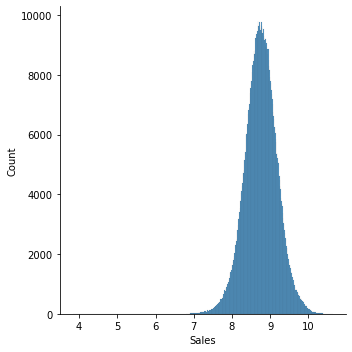

In [26]:
# 2.0 Our dependent feature
dep_var = 'Sales'

# 2.1 Plot its distribution
_=sns.displot(x = 'Sales', data = joined)

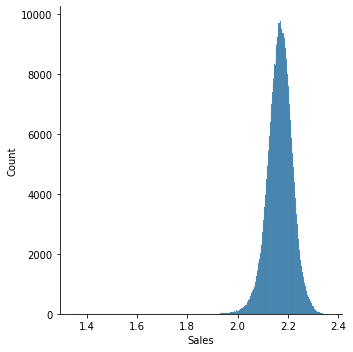

In [27]:
# 2.2 Take its log to make it symmetric
joined[dep_var] = np.log(joined[dep_var])

# 2.3 Plot its distribution
_=sns.displot(x = 'Sales', data = joined)

#### Missing values
There are some missing values in the dataset. Occurrence of these need to be examined in detail. Normally `fastai` will fill in missing values. But, for a particular column, if there are no missing values in the `train` data and there are missing values in `test/validation` data then there are problems.`fastai` is unable to calculate missing values and, therefore, fill in missing values in the `test/train` data.

In [ ]:
# 3.0 Check NAs in the dataset
joined.isnull().sum().sort_values(ascending = False)

In [29]:
# 3.1 In the following two fields NAs exist only in validation
#     data and not in train data. So fill NAs here onlys.

joined['before_event_sh'] = joined['before_event_sh'].fillna(0)
joined['before_event_st'] = joined['before_event_st'].fillna(0)

# 3.2 Also drop these two date-type columns
joined.drop(columns = ['Date', 'CompetitionOpenSince'], inplace = True)

### Apply fastai NNs

#### Pre-processors to apply to our data:
Refer [here](https://docs.fast.ai/tutorial.tabular)

>  `Categorify` is going to take every categorical variable and make a map from integer to unique categories, then replace the values by the corresponding index.<br>
>  `FillMissing` will fill the missing values in the continuous variables by the median of existing values (you can choose a specific value if you prefer)<br>
>  `Normalize` will normalize the continuous variables (substract the mean and divide by the std)<br>

In [30]:
# 4.0 Processes to apply on the dataset
#     TabularPandas class will apply these 
#     processes automatically

procs = [Categorify, FillMissing, Normalize]

We use `cont_cat_split()` helper function that returns column names of 'cont' and 'cat' features from a given DataFrame. This function works by determining if a column is continuous or categorical based on the cardinality of its values. If it is above the `max_card` parameter (or a `float` datatype) then it will be added to the `cont_names` else `cat_names` Refer [here](https://docs.fast.ai/tabular.core.html#cont_cat_split)


In [31]:
help(cont_cat_split)

Help on function cont_cat_split in module fastai.tabular.core:

cont_cat_split(df, max_card=20, dep_var=None)
    Helper function that returns column names of cont and cat variables from given `df`.



In [39]:
# 4.1
cont,cat = cont_cat_split(joined, 20, dep_var=dep_var)

In [40]:
cont[:5],cat[:5]

(['Store', 'Customers', 'Week', 'Day', 'Dayofyear'],
 ['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday'])

In [41]:
joined[cat].nunique().sort_values(ascending=False)

CompetitionOpenSinceMonth    12
Month                        12
Promo2SinceYear               8
DayOfWeek                     7
Dayofweek                     7
StoreType                     4
PromoInterval                 3
Assortment                    3
Year                          3
Is_month_end                  2
Promo                         2
StateHoliday                  2
SchoolHoliday                 2
CompetitionDistanceNA         2
Is_month_start                2
CompetitionOpenNA             2
Is_quarter_start              2
Is_year_end                   2
Is_year_start                 2
Promo2                        2
Is_quarter_end                2
Open                          1
dtype: int64

In [42]:
# 4.2 A tabular object that performs transformation
#     appropriate for further NN processing
to = TabularPandas(
                    joined,
                    procs,
                    cat,
                    cont,
                    y_names=dep_var,
                    splits=splits
                   )

In [43]:
# 4.3 
type(to)     # fastai.tabular.core.TabularPandas

fastai.tabular.core.TabularPandas

In [44]:
# 4.4
len(to.train),len(to.valid)   # (648309, 196029)

(648309, 196029)

In [45]:
# 5.0 Create a dataloader object to load 
#     data in NN, batch by batch.
#     See full syntax of DataLoader here:
#     Ref:  https://docs.fast.ai/tabular.core.html#TabDataLoader

dls = to.dataloaders(bs=64)

In [46]:
# 5.1 Show a batch from validation
#     dataset:

dls.valid.show_batch()

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Dayofweek,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,StoreType,Assortment,CompetitionOpenSinceMonth,Promo2,Promo2SinceYear,PromoInterval,CompetitionOpenNA,CompetitionDistanceNA,CompetitionDistance_na,after_event_st_na,after_event_pr_na,Store,Customers,Week,Day,Dayofyear,Elapsed,CompetitionDistance,CompetitionOpenSinceYear,Promo2SinceWeek,CompetitionDaysOpen,after_event_sh,before_event_sh,after_event_st,before_event_st,after_event_pr,before_event_pr,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw,Sales
0,5,1,1,False,1,#na#,7,4,True,False,False,False,False,False,c,a,9,0,1900,#na#,False,False,False,False,False,1.000012,555.000007,31.0,31.000000,212.000001,1.438301e+09,1269.999975,2008.0,1.0,2509.999982,-7.495180e-07,7.225165e-07,57.000001,-3.998071e-07,-3.289906e-08,-5.711116e-08,5.000000e+00,-2.863911e-08,5.000000e+00,1.0,-1.414180e-08,1.0,2.148088
1,4,1,1,False,1,#na#,7,3,False,False,False,False,False,False,c,a,9,0,1900,#na#,False,False,False,False,False,1.000012,546.000003,31.0,30.000000,210.999999,1.438214e+09,1269.999975,2008.0,1.0,2508.999988,-7.495180e-07,7.225165e-07,55.999999,-3.998071e-07,-3.289906e-08,-5.711116e-08,4.000000e+00,-2.863911e-08,4.000000e+00,2.0,-1.414180e-08,2.0,2.142555
2,3,1,1,False,1,#na#,7,2,False,False,False,False,False,False,c,a,9,0,1900,#na#,False,False,False,False,False,1.000012,523.000011,31.0,29.000000,210.000000,1.438128e+09,1269.999975,2008.0,1.0,2507.999994,-7.495180e-07,7.225165e-07,54.999999,-3.998071e-07,-3.289906e-08,-5.711116e-08,3.000000e+00,-2.863911e-08,3.000000e+00,3.0,-1.414180e-08,3.0,2.136839
3,2,1,1,False,1,#na#,7,1,False,False,False,False,False,False,c,a,9,0,1900,#na#,False,False,False,False,False,1.000012,559.999993,31.0,28.000000,209.000001,1.438042e+09,1269.999975,2008.0,1.0,2507.000001,-7.495180e-07,7.225165e-07,53.999999,-3.998071e-07,-3.289906e-08,-5.711116e-08,2.000000e+00,-2.863911e-08,2.000000e+00,4.0,-1.414180e-08,4.0,2.142345
4,1,1,1,False,1,#na#,7,0,False,False,False,False,False,False,c,a,9,0,1900,#na#,False,False,False,False,False,1.000012,612.000005,31.0,26.999999,207.999999,1.437955e+09,1269.999975,2008.0,1.0,2506.000007,-7.495180e-07,7.225165e-07,52.999999,-3.998071e-07,-3.289906e-08,-5.711116e-08,1.000000e+00,-2.863911e-08,1.000000e+00,5.0,-1.414180e-08,5.0,2.165203
5,6,1,0,False,0,#na#,7,5,False,False,False,False,False,False,c,a,9,0,1900,#na#,False,False,False,False,False,1.000012,499.999994,30.0,25.000000,206.000000,1.437782e+09,1269.999975,2008.0,1.0,2504.000019,1.060000e+02,-2.000000e+00,51.000001,-3.998071e-07,8.000000e+00,-2.000000e+00,-1.811448e-08,-2.863911e-08,-8.362978e-08,5.0,-1.414180e-08,5.0,2.125984
6,5,1,0,False,0,#na#,7,4,False,False,False,False,False,False,c,a,9,0,1900,#na#,False,False,False,False,False,1.000012,458.999994,30.0,24.000000,205.000000,1.437696e+09,1269.999975,2008.0,1.0,2503.000025,1.050000e+02,-3.000000e+00,50.000001,-3.998071e-07,7.000000e+00,-3.000000e+00,-1.811448e-08,-2.863911e-08,-8.362978e-08,4.0,-1.414180e-08,4.0,2.106291
7,4,1,0,False,0,#na#,7,3,False,False,False,False,False,False,c,a,9,0,1900,#na#,False,False,False,False,False,1.000012,502.999995,30.0,23.000000,204.000000,1.437610e+09,1269.999975,2008.0,1.0,2502.000031,1.040000e+02,-4.000000e+00,49.000001,-3.998071e-07,6.000000e+00,-4.000000e+00,-1.811448e-08,-2.863911e-08,1.000000e+00,3.0,-1.414180e-08,3.0,2.108341
8,3,1,0,False,0,#na#,7,2,False,False,False,False,False,False,c,a,9,0,1900,#na#,False,False,False,False,False,1.000012,463.000011,30.0,22.000000,203.000000,1.437523e+09,1269.999975,2008.0,1.0,2501.000037,1.030000e+02,-4.999999e+00,48.000001,-3.998071e-07,5.000000e+00,-5.000000e+00,-1.811448e-08,-2.863911e-08,2.000000e+00,2.0,-1.414180e-08,2.0,2.098040
9,2,1,0,False,0,#na#,7,1,False,False,False,False,False,False,c,a,9,0,1900,#na#,False,False,False,False,False,1.000012,468.999990,30.0,21.000000,202.000001,1.437437e+09,1269.999

In [ ]:
# 5.2 Show a batch from 'train'
#     dataset:
dls.train.show_batch()

In [ ]:
# 5.3 Show batch

dls.show_batch()

#### Start modeling

Full syntax of [tabular_learner](https://docs.fast.ai/learner.html#Learner) is here:<br>

class TabularLearner
> `TabularLearner(dls, model, loss_func=None, opt_func=Adam, lr=0.001, splitter=trainable_params, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95))`

Here is an example:
> `tabular_learner(data, layers=[300,200, 100, 50], metrics= [rmse,r2_score])`
The above line of code will initialize a neural network with 4 layers and the number of nodes in each layer as 300,200, 100 and 50 respectively. 

The network will use two primary metrics for evaluation: Root Mean Squared Error(RMSE) and  R-Squared



In [47]:
# 6.0
# Ref: https://docs.fast.ai/tabular.learner.html
#     

learn = tabular_learner(
                        dls,
                        metrics=rmse    # metrics:  https://docs.fast.ai/metrics.html
                        )

In [48]:
help(learn.fit_one_cycle)

Help on method fit_one_cycle in module fastai.callback.schedule:

fit_one_cycle(n_epoch, lr_max=None, div=25.0, div_final=100000.0, pct_start=0.25, wd=None, moms=None, cbs=None, reset_opt=False) method of fastai.tabular.learner.TabularLearner instance
    Fit `self.model` for `n_epoch` using the 1cycle policy.



In [49]:
# 6.1 
# One-cycle approach: 
#   https://towardsdatascience.com/finding-good-learning-rate-and-the-one-cycle-policy-7159fe1db5d6

n_epoch = 10
learn.fit_one_cycle(n_epoch)

epoch,train_loss,valid_loss,_rmse,time
0,0.001699,0.032101,0.179168,03:53
1,0.001218,0.002862,0.053501,03:53
2,0.000787,0.010530,0.102615,03:51
3,0.000654,0.000664,0.025766,03:52
4,0.000498,0.000504,0.022452,03:55
5,0.000428,0.000444,0.021074,03:56
6,0.000339,0.000390,0.019751,03:56
7,0.000314,0.000349,0.018679,03:56
8,0.000258,0.000347,0.018623,03:54
9,0.000256,0.000339,0.018414,03:56


In [50]:
learn.summary()

TabularModel (Input shape: 64 x torch.Size([64, 22]))
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 5              
Embedding                                 40         True      
____________________________________________________________________________
                     64 x 2              
Embedding                                 4          True      
____________________________________________________________________________
                     64 x 3              
Embedding                                 9          True      
Embedding                                 9          True      
Embedding                                 9          True      
Embedding                                 9          True      
____________________________________________________________________________
                     64 x 7              
Embedding                                 91         True      
___________________________________

In [54]:
# 6.2 Show results:
results = learn.show_results()

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Dayofweek,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,StoreType,Assortment,CompetitionOpenSinceMonth,Promo2,Promo2SinceYear,PromoInterval,CompetitionOpenNA,CompetitionDistanceNA,CompetitionDistance_na,after_event_st_na,after_event_pr_na,Store,Customers,Week,Day,Dayofyear,Elapsed,CompetitionDistance,CompetitionOpenSinceYear,Promo2SinceWeek,CompetitionDaysOpen,after_event_sh,before_event_sh,after_event_st,before_event_st,after_event_pr,before_event_pr,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw,Sales,Sales_pred
0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.126673,1.059609,-0.994358,-0.779590,-1.058433,2.146801,-0.590529,0.626938,-0.738085,1.271765,-0.270424,-0.023762,1.363965,0.055841,0.085898,-1.250357,-0.607749,-0.542547,0.764460,-0.608258,-0.542253,-1.490739,2.222411,2.197004
1,3.0,1.0,2.0,1.0,1.0,0.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,9.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.048964,0.526313,-1.061110,-1.354742,-1.106051,2.122632,-0.676231,0.744888,-0.738085,-0.170935,1.571472,-0.197589,1.196466,-0.105980,-0.883267,0.904653,-0.607749,-0.542547,0.206499,-0.608258,-0.542253,0.190084,2.170051,2.182076
2,2.0,1.0,1.0,1.0,2.0,0.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.344260,-0.456334,-0.260085,1.175925,-0.315599,2.523846,-0.568784,-1.456847,-0.738085,-0.761937,-1.053229,1.019201,-0.847028,0.573667,0.408953,-0.942498,-0.123422,-0.151117,0.206499,-0.126248,-0.542253,-0.930465,2.168022,2.126454
3,1.0,1.0,1.0,1.0,1.0,0.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,12.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.278086,-0.473617,-0.126581,-0.894621,-0.191793,2.586686,-0.425520,0.666255,-0.738085,0.791741,-0.454613,-0.632156,-0.411529,0.864945,0.085898,-1.250357,-0.607749,-0.542547,0.764460,-0.608258,-0.542253,-1.490739,2.166919,2.141368
4,5.0,1.0,2.0,1.0,1.0,0.0,3.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.707941,-0.394610,-0.927606,0.485743,-0.953674,2.199974,-0.628903,0.587621,-0.738085,1.858827,0.236098,0.454263,1.732464,0.411847,-0.883267,0.904653,-0.607749,-0.542547,1.322420,-0.608258,-0.542253,-0.930465,2.162344,2.145351
5,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-1.002567,0.768271,-1.528375,-0.434499,-1.591750,1.876103,-0.570063,0.646596,-0.738085,0.955251,-0.592755,0.106609,-0.512029,-1.756551,-0.883267,0.904653,-0.607749,-0.542547,1.322420,-0.608258,-0.542253,1.310632,2.221535,2.210605
6,2.0,1.0,2.0,1.0,1.0,0.0,7.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,-1.213937,0.313982,0.207180,-0.204439,0.151054,2.760707,0.906060,-1.456847,-0.738085,-0.761937,0.742619,0.323892,0.459468,0.864945,-0.883267,0.904653,-0.607749,-0.542547,-0.351461,-0.608258,-0.542253,0.750358,2.228308,2.191314
7,6.0,1.0,1.0,1.0,1.0,0.0,7.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-0.747680,-0.839023,0.207180,0.255682,0.189148,2.780042,3.437470,0.784205,-0.738085,-0.440169,-1.007182,0.932287,0.593468,0.864945,-0.560212,-1.866074,1.813890,-0.542547,1.322420,1.801791,-0.542253,-1.490739,2.133070,2.121473
8,6.0,1.0,1.0,1.0,1.0,0.0,3.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.747451,0.301637,-0.860854,1.405985,-0.877486,2.238645,-0.352610,-1.456847,-0.738085,-0.761937,2.676610,0.932287,2.000463,0.670760,1.701174,0.288936,-0.607749,-0.542547,-1.467382,1.801791,-0.150721,1.310632,2.213818,2.191311


In [52]:
# 7.0 Predict for anyother data:

test_df = joined.copy()
test_df.drop(['Sales'], axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)

In [57]:
# 7.1
result = learn.get_preds(dl=dl)

In [59]:
result

AttributeError: ignored

In [51]:
learn

By default, for tabular data fastai creates a neural network with two hidden layers, with 200 and 100 activations, respectively. This works quite well for small datasets, but here we've got quite a large dataset, so we increase the layer sizes to 500 and 250:

`learn = tabular_learner(dls, y_range=(8,12), layers=[500,250],
                        n_out=1, loss_func=F.mse_loss)`

SuggestedLRs(lr_min=4.365158383734525e-06, lr_steep=3.0199516913853586e-05)

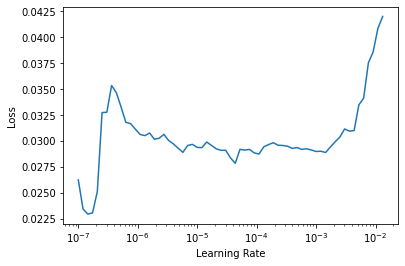

In [52]:
learn.lr_find()